# Computer Intensive Methods - Homework 1 - 13 October 2015

## 1.1 Estimate the mean of the ozone levels and use a non-parametric bootstrap to obtain its standard error

In [2]:
import math
import numpy as np # Imports the numpy package for easy matrix manipulation
import pandas as pd # Imports the pandas package for data frame manipulation
from scipy import stats
import matplotlib # Imports plotting capabilities
import matplotlib.pyplot as plt
from matplotlib import style # Sets graphics style
style.use('ggplot')
%matplotlib inline

ozone = np.array([41, 36, 12, 18, 28, 23, 19, 8, 7, 16, 11, 14, 18, 14,
                  34, 6, 30, 11, 1, 11, 4, 32, 23, 45, 115, 37, 29, 71,
                  39, 23, 21, 37, 20, 12, 13, 135, 49, 32, 64, 40, 77, 97,
                  97, 85, 10, 27, 7, 48, 35, 61, 79, 63, 16, 80, 108, 20,
                  52, 82, 50, 64, 59, 39, 9, 16, 78, 35, 66, 122, 89, 110,
                  44, 28, 65, 22, 59, 23, 31, 44, 21, 9, 45, 168, 73, 76,
                  118, 84, 85, 96, 78, 73, 91, 47, 32, 20, 23, 21, 24, 44,
                  21, 28, 9, 13, 46, 18, 13, 24, 16, 13, 23, 36, 7, 14, 30, 14, 18, 20])
ozone

array([ 41,  36,  12,  18,  28,  23,  19,   8,   7,  16,  11,  14,  18,
        14,  34,   6,  30,  11,   1,  11,   4,  32,  23,  45, 115,  37,
        29,  71,  39,  23,  21,  37,  20,  12,  13, 135,  49,  32,  64,
        40,  77,  97,  97,  85,  10,  27,   7,  48,  35,  61,  79,  63,
        16,  80, 108,  20,  52,  82,  50,  64,  59,  39,   9,  16,  78,
        35,  66, 122,  89, 110,  44,  28,  65,  22,  59,  23,  31,  44,
        21,   9,  45, 168,  73,  76, 118,  84,  85,  96,  78,  73,  91,
        47,  32,  20,  23,  21,  24,  44,  21,  28,   9,  13,  46,  18,
        13,  24,  16,  13,  23,  36,   7,  14,  30,  14,  18,  20])

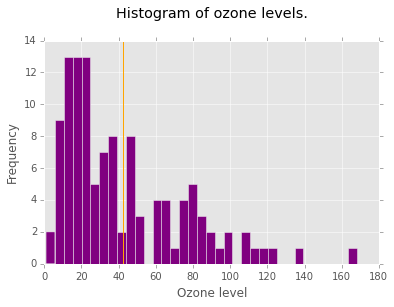

In [15]:
plt.hist(ozone,bins=35,color='purple',alpha=1)
plt.title("Histogram of ozone levels.",y=1.08)
plt.xlabel(r"Ozone level")
plt.ylabel("Frequency")
plt.annotate(r'$\bar{x}$', xy=(ozoneMean, 60), xytext=(50, 50),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(ozoneMean,color='orange')
plt.show()

We can estimate the mean of ozone using the **sample mean**:

$$\bar{x} = \frac{1}{N} \sum\limits_{i=1}^N x_i$$

In [3]:
ozoneMean = np.mean(ozone)
ozoneMean

42.129310344827587

The **non-parametric** bootstrap procedure consists of *resampling with replacement from the observed data*. In other words, we sample from the empirical distribution $\hat{F}$.

In [6]:
def bootstrapResample(sample):
    """ This function returns a random sample of rows drawn with replacement from the provided array.
    
    Args: sample (numpy array): the observed data in array format (n x 2) from which to sample.
    
    Returns: bootstrapSample (numpy array): a new array with random rows sampled from the input.
    """
    n = len(sample) # bootstrap samples have the same size as the original sample
    bootstrapSample = sample[np.random.choice(n, n)] # random.choice returns a vector of size n with random digits
                                                     # between 0 and 14, then we slice the input array using this vector
    return bootstrapSample
bootstrapResample(ozone)

array([ 79, 168,  14,  59,  24,  11,  32,  21,  34,  12,  44,  13,   7,
        34,  49,  13,  21,  85,  76,  44,  23,  34,  16,  20,  20,  13,
       108,  14,  97,   8,  14,  78,  18,  44, 168,  16,  44,  16, 115,
        85,  10,   9, 110,   4,  12,   7,  16,  39,  35,   4,  63,  64,
        35,  14,  37,  16,  23,  12,  32,  47,  71,   8,  14,  28,  76,
        11,  48,  22,  30,  59,  44,  24,  37,  12,  27,  23,  12,  22,
        14,  30,  12,  13,  23,  37,  18,  11,  45,  44,  16,  78,   7,
        44,  97,  61,  23,  13,  85,  31,   6,  12,  16, 168,  10,  12,
        13,  44,  65,  23,  21,   7,  27,  16,   9,  65,  64,  63])

When we repeat the process a *thousand times* and calculate sample means for each bootstrap sample (**bootstrap replicates**) we can generate a **histogram** (an approximation of the **sampling distribution**) and calculate the **standard errors** of $\bar{x}$, i.e. the sample standard deviation of our bootstrap replicates.

In [11]:
def bootstrapMean(sample,replicates): # replicates is number of bootstraps sample to take
    """ 
This function returns the bootstrap replicates for the mean based on the input sample.

Args: sample (numpy array): the observed data in array format (n x 1) from which to sample
      replicates (int): number of bootstrap samples to perform
          
Returns: bootstrapCorr (numpy array): a new array (replicates x 1) containing the means for each bootstrap sample.
    """
    n = len(sample)
    bootstrapMean = np.zeros(replicates)
    for i in range(replicates):
        bootstrapSample = bootstrapResample(sample)
        bootstrapMean[i] = np.mean(bootstrapSample)
    return bootstrapMean

bootstrapMeans = bootstrapMean(ozone,1000)
bootstrapMeans[0:10] # print first 10 bootstrap replicates

array([ 42.69827586,  37.85344828,  43.98275862,  43.07758621,
        39.88793103,  40.23275862,  42.85344828,  43.04310345,
        38.97413793,  42.23275862])

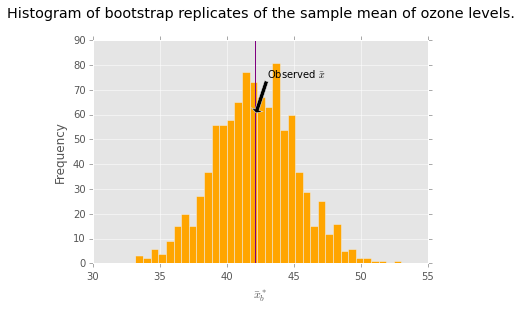

In [12]:
plt.hist(bootstrapMeans,bins=35,color='orange',alpha=1)
plt.title("Histogram of bootstrap replicates of the sample mean of ozone levels.",y=1.08)
plt.xlabel(r"$\bar{x}^*_b}$")
plt.ylabel("Frequency")
plt.annotate(r'Observed $\bar{x}$', xy=(ozoneMean, 60), xytext=(43, 75),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(ozoneMean,color='purple')
plt.show()

The bootstrap standard error of the sample mean is: $$ \hat{se}_B = \sqrt{\frac{\sum (\bar{x}^*_b - \bar{x}^*.)^2} {B-1}} $$

In [18]:
seMean = np.std(bootstrapMeans, ddof=1)
print(seMean)

3.07237180492


Compared to the theoretical one $$ \text{SE}_\bar{x}\ = \frac{s}{\sqrt{n}} $$

In [17]:
np.std(ozone,ddof=1) / math.sqrt(len(ozone))

3.0628481853266725

## 1.2 Confidence interval for ozone

The classical confidence interval for the sample mean of a normally distributed random variable with unknown variance is given by:

$$
[\, \hat\mu - t_{n-1,1-\alpha/2}\,  \frac{1}{\sqrt{n}}s,\ \ 
                      \hat\mu + t_{n-1,1-\alpha/2}\,\frac{1}{\sqrt{n}}s \,]
$$

where $s$ is the sample standard deviation, $\hat{\mu}$ is the sample mean $\bar{x}$, $n$ is the sample size and $t_{n-1,1-\alpha/2}$ is a quantile of the t-distribution.

In [25]:
ozoneSD = np.std(ozone, ddof=1)
ozoneSD

32.987884514433951

In [35]:
stats.t.interval(0.95, loc=ozoneMean, scale=ozoneSD/math.sqrt(ozone.shape[0]),df=ozone.shape[0]-1)

(36.062397562188522, 48.196223127466652)

## 2.1 Non-parametric bootstrap to test hypothesis about correlation coefficient

C:\Miniconda3\envs\snowflakes\lib\site-packages\matplotlib\collections.py:590: FutureWarning: elementwise comparison failed; returning scalar instead, but in the future will perform elementwise comparison
  if self._edgecolors == str('face'):


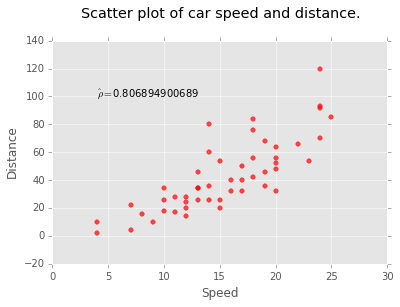

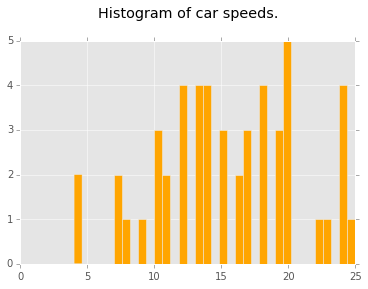

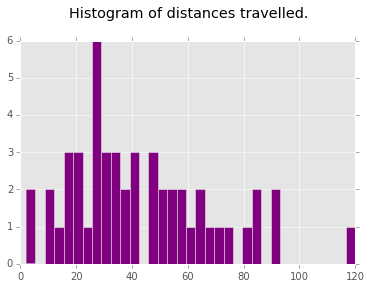

In [9]:
speed = np.array([4, 4, 7, 7, 8, 9, 10, 10, 10, 11, 11, 12, 12, 12, 12, 13,
                  13, 13, 13, 14, 14, 14, 14, 15, 15, 15, 16, 16, 17, 17, 17,
                  18, 18, 18, 18, 19, 19, 19, 20, 20, 20, 20, 20, 22, 23, 24, 24, 24, 24, 25])
distance = np.array([2, 10, 4, 22, 16, 10, 18, 26, 34, 17, 28, 14, 20, 24, 28, 26, 34, 34, 
                     46, 26, 36, 60, 80, 20, 26, 54, 32, 40, 32, 40, 50, 42, 56, 76, 84, 36, 
                     46, 68, 32, 48, 52, 56, 64, 66, 54, 70, 92, 93, 120, 85])

cars = np.vstack((speed, distance))

obsCorr = np.corrcoef(speed,distance)[0,1]

plt.scatter(speed,distance,color=['red'],alpha=0.7)
plt.xlabel('Speed')
plt.ylabel('Distance')
plt.title('Scatter plot of car speed and distance.', y=1.08)
plt.text(4,100,r'$\hat{\rho} = $'+str(obsCorr))
plt.show()

plt.hist(speed,bins=35,color='orange',alpha=1)
plt.title('Histogram of car speeds.', y=1.08)
plt.show()

plt.hist(distance,bins=35,color='purple',alpha=1)
plt.title('Histogram of distances travelled.', y=1.08)
plt.show()

We want to test the hypothesis:

$$
H_0 : \rho(X,Y) = 0 \text{ vs } H_1: \rho(X,Y) > 0
$$

The classical correlation test based on a t-distribution for the correlation coefficient rejects the null hypothesis of no association.

In [10]:
stats.pearsonr(speed,distance)[1]

1.4898364962950702e-12

A parametric bootstrap approach starts by generating bootstrap samples under the null hypothesis, i.e. $\rho = 0$. In this case there would be no association between x and y, so it would not matter which pairs we consider. For a non-parametric procedure this could be achieved by sampling x and y independently from the observed dataset. 

For a parametric procedure we instead define two independent distributions for x and y and sample from them. Since we assume that there is association, we will sample from two normal distributions $ x (y) \sim \mathcal{N}(\mu_{x(y)},\sigma^2_{x(y)}) $ rather than a bivariate normal distributions (which would also be defined by a covariance parameter).

In [18]:
mean = np.mean(cars,axis=1)
mean

array([ 15.4 ,  42.98])

In [21]:
sd = np.std(cars,axis=1)
sd

array([  5.23450093,  25.5103822 ])

In [141]:
def paramBootstrapResample(sample,replicates):
    """ This function returns a random sample of x,y pairs drawn from separate normal distributions based on the provided sample.
    
    Args: sample (numpy array): the observed data in array format (2 x n) from which to sample.
          replicates (int): number of bootstrap samples to generate
    
    Returns: paramBootstrapSamples (numpy array): x,y arrays with random variables sampled from the multivariate distribution based on the provided 
                                 sample, of size replicates x sample
    """
    n = sample.shape[1] # bootstrap samples have the same size as the original sample
    paramBootstrapSamples = np.zeros((replicates,n,2))
    mean = np.mean(sample,axis=1) # calculate the mean vector for x,y
    sd = np.std(sample,axis=1) # calculate the standard deviation for x,y
    xSample = np.random.normal(mean[0], sd[0], (replicates,n))
    ySample = np.random.normal(mean[1], sd[1], (replicates,n))
    paramBootstrapSamples[:,:,0],paramBootstrapSamples[:,:,1] = xSample,ySample # array of size replicates x sample size x 2
    
    return paramBootstrapSamples

paramBootstraps = paramBootstrapResample(cars,1000)

In [177]:
def CorrCoef(sample):
    count = 0
    paramBootstrapCorr = np.zeros(sample.shape[0])
    for i in sample:
        paramBootstrapCorr[count] = np.corrcoef(i[:,0],i[:,1])[0,1]
        count += 1
    return paramBootstrapCorr
Corrs =  CorrCoef(paramBootstraps)

The p-value can be obtained as follows:

$$
P = \frac{1+\#\{|\hat{\rho}^*|>|\hat{\rho}^{obs}|}{B + 1}
$$

In [198]:
P = (1 + (np.absolute(Corrs) > obsCorr).sum() ) / (len(Corrs)+1)
P

0.000999000999000999

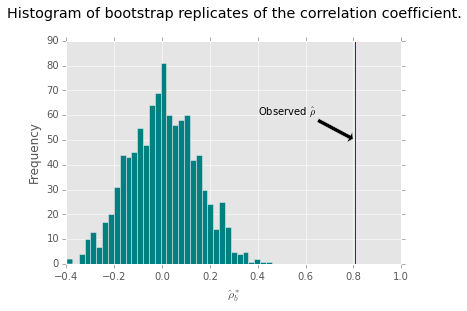

In [204]:
plt.hist(Corrs,bins=35,color='teal',alpha=1)
plt.title("Histogram of bootstrap replicates of the correlation coefficient.",y=1.08)
plt.xlabel(r"$\hat{\rho}^*_b}$")
plt.ylabel("Frequency")
plt.annotate(r'Observed $\hat{\rho}$', xy=(obsCorr, 50), xytext=(0.4, 60),
            arrowprops=dict(facecolor='black', shrink=0.05))
plt.axvline(obsCorr,color='purple')
plt.show()